# The Kopi Latte Ratio Project: Data Visualisation

The objective of this notebook is to consolidate and aggregate the data to visualise on a map using GeoPandas

## Load and consolidate all labelled datasets

In [1]:
import os
os.chdir('..')

In [2]:
# load places labelled using heuristics method
import pandas as pd
places_labelled = pd.read_csv('data/interim/places_labelled.csv')
places_labelled.head()

,business_status,formatted_address,icon,icon_background_color,icon_mask_base_uri,name,photos,place_id,price_level,rating,...,geometry.viewport.northeast.lat,geometry.viewport.northeast.lng,geometry.viewport.southwest.lat,geometry.viewport.southwest.lng,opening_hours.open_now,plus_code.compound_code,plus_code.global_code,permanently_closed,is_cafe,is_kopitiam
0,OPERATIONAL,"739 Bedok Reservoir Rd, Singapore 470741",https://maps.gstatic.com/mapfiles/place_api/ic...,#FF9E67,https://maps.gstatic.com/mapfiles/place_api/ic...,Happy Hawkers Coffeeshop,"[{'height': 3024, 'html_attributions': ['<a hr...",ChIJxQb7Ulo92jERes4lOO9WDso,NaN,3.7,...,1.339114,103.923991,1.336415,103.921291,True,8WQF+52 Singapore,6PH58WQF+52,NaN,0,1
1,OPERATIONAL,"1 Swan Lake Ave, Opera Estate, Singapore 455700",https://maps.gstatic.com/mapfiles/place_api/ic...,#FF9E67,https://maps.gstatic.com/mapfiles/place_api/ic...,Baker & Cook - Swan Lake,"[{'height': 3456, 'html_attributions': ['<a hr...",ChIJfYtFcq4i2jERVe8R8VhEmrg,2.0,4.3,...,1.322293,103.925673,1.319593,103.922973,True,8WCF+9P Singapore,6PH58WCF+9P,NaN,1,0
2,OPERATIONAL,"29B Chai Chee Ave, #01-60, Singapore 462029",https://maps.gstatic.com/mapfiles/place_api/ic...,#FF9E67,https://maps.gstatic.com/mapfiles/place_api/ic...,Kimly Coffeeshop (Chai Chee 29 FoodHouse),"[{'height': 1236, 'html_attributions': ['<a hr...",ChIJN2zPCK0i2jERyJsDXfiesho,1.0,3.8,...,1.325331,103.925274,1.322631,103.922575,True,8WFF+JG Singapore,6PH58WFF+JG,NaN,0,1
3,OPERATIONAL,"311 New Upper Changi Rd, #01-01, Singapore 467360",https://maps.gstatic.com/mapfiles/place_api/ic...,#FF9E67,https://maps.gstatic.com/mapfiles/place_api/ic...,The Coffee Bean & Tea Leaf,"[{'height': 4284, 'html_attributions': ['<a hr...",ChIJL-rUh7kj2jEReVwjCg1YIW8,2.0,3.7,...,1.326535,103.931311,1.323835,103.928612,True,8WFJ+V2 Singapore,6PH58WFJ+V2,NaN,1,0
4,OPERATIONAL,"900 Bedok North Rd, #01-01 HomeTeamNS, Singapo...",https://maps.gstatic.com/mapfiles/place_api/ic...,#FF9E67,https://maps.gstatic.com/mapfiles/place_api/ic...,Fun Toast,"[{'height': 4032, 'html_attributions': ['<a hr...",ChIJ840QRIE92jERlGb5nG8QtPE,NaN,4.1,...,1.342854,103.920174,1.340155,103.917475,True,8WR9+HH Singapore,6PH58WR9+HH,NaN,0,1


In [3]:
# places labeled using the finetuned model and manual checks are saved in data/interim/places_predictions_manual.csv
import pandas as pd
places_predictions_manual = pd.read_csv('data/interim/places_predictions_manual.csv')
places_predictions_manual.head()

,place_id,name,CAFE,KOPITIAM,ratio,ratio_bin,quantile_bin,review_label,manual_label
0,ChIJ--EXPbAb2jER94utrs6-RuI,Nam Kee Pau,0.000000,4.950461,0.000000,"(-1.0, 0.0]",0,kopitiam,NaN
1,ChIJ-0-PEvwR2jERIahkNlKmLRA,Ba Buông Bánh Mì,0.000000,4.787330,0.000000,"(-1.0, 0.0]",0,kopitiam,NaN
2,ChIJ-131x5YZ2jERo9zl8Ly76fw,Honolulu Cafe - The Centrepoint (HK Cha Chaan ...,0.000000,4.886066,0.000000,"(-1.0, 0.0]",0,kopitiam,NaN
3,ChIJ-1S2tAEj2jERTu0qUzcjqVU,CORNERSHOP,1.815885,2.834643,0.390469,"(0.3, 0.4]",8,kopitiam,NaN
4,ChIJ-1VFVgAX2jERVNhDii9zSCI,煲仔King (Claypot King) @ Serangoon,0.000000,1.980073,0.000000,"(-1.0, 0.0]",0,kopitiam,NaN


In [4]:
# prioritise manual_label over review_label
places_predictions_manual['final_label'] = places_predictions_manual['manual_label'].combine_first(places_predictions_manual['review_label'])
places_predictions_manual.head()

,place_id,name,CAFE,KOPITIAM,ratio,ratio_bin,quantile_bin,review_label,manual_label,final_label
0,ChIJ--EXPbAb2jER94utrs6-RuI,Nam Kee Pau,0.000000,4.950461,0.000000,"(-1.0, 0.0]",0,kopitiam,NaN,kopitiam
1,ChIJ-0-PEvwR2jERIahkNlKmLRA,Ba Buông Bánh Mì,0.000000,4.787330,0.000000,"(-1.0, 0.0]",0,kopitiam,NaN,kopitiam
2,ChIJ-131x5YZ2jERo9zl8Ly76fw,Honolulu Cafe - The Centrepoint (HK Cha Chaan ...,0.000000,4.886066,0.000000,"(-1.0, 0.0]",0,kopitiam,NaN,kopitiam
3,ChIJ-1S2tAEj2jERTu0qUzcjqVU,CORNERSHOP,1.815885,2.834643,0.390469,"(0.3, 0.4]",8,kopitiam,NaN,kopitiam
4,ChIJ-1VFVgAX2jERVNhDii9zSCI,煲仔King (Claypot King) @ Serangoon,0.000000,1.980073,0.000000,"(-1.0, 0.0]",0,kopitiam,NaN,kopitiam


In [5]:
import numpy as np

# convert final_label into a binary variable
places_predictions_manual['is_cafe'] = np.where(places_predictions_manual['final_label']=='cafe', 1, 0)
places_predictions_manual.head()

,place_id,name,CAFE,KOPITIAM,ratio,ratio_bin,quantile_bin,review_label,manual_label,final_label,is_cafe
0,ChIJ--EXPbAb2jER94utrs6-RuI,Nam Kee Pau,0.000000,4.950461,0.000000,"(-1.0, 0.0]",0,kopitiam,NaN,kopitiam,0
1,ChIJ-0-PEvwR2jERIahkNlKmLRA,Ba Buông Bánh Mì,0.000000,4.787330,0.000000,"(-1.0, 0.0]",0,kopitiam,NaN,kopitiam,0
2,ChIJ-131x5YZ2jERo9zl8Ly76fw,Honolulu Cafe - The Centrepoint (HK Cha Chaan ...,0.000000,4.886066,0.000000,"(-1.0, 0.0]",0,kopitiam,NaN,kopitiam,0
3,ChIJ-1S2tAEj2jERTu0qUzcjqVU,CORNERSHOP,1.815885,2.834643,0.390469,"(0.3, 0.4]",8,kopitiam,NaN,kopitiam,0
4,ChIJ-1VFVgAX2jERVNhDii9zSCI,煲仔King (Claypot King) @ Serangoon,0.000000,1.980073,0.000000,"(-1.0, 0.0]",0,kopitiam,NaN,kopitiam,0


In [6]:
# combine heuristic, review & label labels into one dataset
places_labelled_clean = pd.concat([places_labelled[['place_id', 'is_cafe']], places_predictions_manual[['place_id', 'is_cafe']]])
places_labelled_clean.head()

,place_id,is_cafe
0,ChIJxQb7Ulo92jERes4lOO9WDso,0
1,ChIJfYtFcq4i2jERVe8R8VhEmrg,1
2,ChIJN2zPCK0i2jERyJsDXfiesho,0
3,ChIJL-rUh7kj2jEReVwjCg1YIW8,1
4,ChIJ840QRIE92jERlGb5nG8QtPE,0


In [7]:
# load original places data with geometry info and join with labels
places = pd.read_csv('data/raw/places.csv')
places = places[['place_id', 'name', 'geometry.location.lat', 'geometry.location.lng']] 
places.head()

,place_id,name,geometry.location.lat,geometry.location.lng
0,ChIJV6HD-Eo92jERjhfY7NEDrOM,Percolate,1.328262,103.935252
1,ChIJhbwWY-I92jERxtB-gF22sL0,Generation Coffee Roasters (Bedok),1.327248,103.933039
2,ChIJcf_SpPk82jERM28p3SYNBnI,Refuel Cafe,1.337519,103.921323
3,ChIJ3Vc6OY092jERhObI1bZ_4Sk,Marie's Lapis Cafe,1.331827,103.924498
4,ChIJOb_8OAwj2jERPK-QVelr5Vk,COFFEESARANG,1.325154,103.929854


In [8]:
places_labelled_clean = places.merge(places_labelled_clean, on='place_id')
places_labelled_clean

,place_id,name,geometry.location.lat,geometry.location.lng,is_cafe
0,ChIJV6HD-Eo92jERjhfY7NEDrOM,Percolate,1.328262,103.935252,1
1,ChIJhbwWY-I92jERxtB-gF22sL0,Generation Coffee Roasters (Bedok),1.327248,103.933039,1
2,ChIJcf_SpPk82jERM28p3SYNBnI,Refuel Cafe,1.337519,103.921323,1
3,ChIJ3Vc6OY092jERhObI1bZ_4Sk,Marie's Lapis Cafe,1.331827,103.924498,0
4,ChIJOb_8OAwj2jERPK-QVelr5Vk,COFFEESARANG,1.325154,103.929854,1
...,...,...,...,...,...
4624,ChIJuUsAdqAZ2jERaA1ZEZVFaOI,Swissbake Cafe - The Central,1.289083,103.846677,0
4625,ChIJQb_QTZEV2jERRk7bpGuNS0k,good mood,1.433389,103.841557,1
4626,ChIJPzKk6hIU2jERC60qWdQKPts,FOOD LANE,1.418913,103.835556,0
4627,ChIJbRUNKUIU2jERHlin0Niw25M,Huat Heng Desserts,1.425036,103.847301,0


In [9]:
from shapely.geometry import Point
import geopandas as gpd

geometry = [Point(xy) for xy in zip(places_labelled_clean['geometry.location.lng'], places_labelled_clean['geometry.location.lat'])]

places_labelled_gdf = gpd.GeoDataFrame(places_labelled_clean, geometry=geometry)
places_labelled_gdf.set_crs(epsg=4326, inplace=True)


,place_id,name,geometry.location.lat,geometry.location.lng,is_cafe,geometry
0,ChIJV6HD-Eo92jERjhfY7NEDrOM,Percolate,1.328262,103.935252,1,POINT (103.93525 1.32826)
1,ChIJhbwWY-I92jERxtB-gF22sL0,Generation Coffee Roasters (Bedok),1.327248,103.933039,1,POINT (103.93304 1.32725)
2,ChIJcf_SpPk82jERM28p3SYNBnI,Refuel Cafe,1.337519,103.921323,1,POINT (103.92132 1.33752)
3,ChIJ3Vc6OY092jERhObI1bZ_4Sk,Marie's Lapis Cafe,1.331827,103.924498,0,POINT (103.92450 1.33183)
4,ChIJOb_8OAwj2jERPK-QVelr5Vk,COFFEESARANG,1.325154,103.929854,1,POINT (103.92985 1.32515)
...,...,...,...,...,...,...
4624,ChIJuUsAdqAZ2jERaA1ZEZVFaOI,Swissbake Cafe - The Central,1.289083,103.846677,0,POINT (103.84668 1.28908)
4625,ChIJQb_QTZEV2jERRk7bpGuNS0k,good mood,1.433389,103.841557,1,POINT (103.84156 1.43339)
4626,ChIJPzKk6hIU2jERC60qWdQKPts,FOOD LANE,1.418913,103.835556,0,POINT (103.83556 1.41891)
4627,ChIJbRUNKUIU2jERHlin0Niw25M,Huat Heng Desserts,1.425036,103.847301,0,POINT (103.84730 1.42504)


## Load in planning areas polygon & GeoJSON data

In [10]:
planning_areas_df = pd.read_csv('data/raw/planning_areas.csv')
planning_areas_df.head()

,pln_area_n,geojson
0,BEDOK,"{""type"":""MultiPolygon"",""coordinates"":[[[[103.9..."
1,BUKIT TIMAH,"{""type"":""MultiPolygon"",""coordinates"":[[[[103.7..."
2,BUKIT BATOK,"{""type"":""MultiPolygon"",""coordinates"":[[[[103.7..."
3,BUKIT MERAH,"{""type"":""MultiPolygon"",""coordinates"":[[[[103.8..."
4,CENTRAL WATER CATCHMENT,"{""type"":""MultiPolygon"",""coordinates"":[[[[103.8..."


In [11]:
# define function to parse geojson column 

import json
from shapely.geometry import shape
def parse_geom(geom_str):
    try:
        return shape(json.loads(geom_str))
    except (TypeError, AttributeError):  # Handle NaN and empty strings
        return None

In [12]:
planning_areas_df["geometry"] = planning_areas_df["geojson"].apply(parse_geom)
planning_areas_df.head()

,pln_area_n,geojson,geometry
0,BEDOK,"{""type"":""MultiPolygon"",""coordinates"":[[[[103.9...","MULTIPOLYGON (((103.932080145 1.305547697, 103..."
1,BUKIT TIMAH,"{""type"":""MultiPolygon"",""coordinates"":[[[[103.7...","MULTIPOLYGON (((103.797658115 1.348128473, 103..."
2,BUKIT BATOK,"{""type"":""MultiPolygon"",""coordinates"":[[[[103.7...","MULTIPOLYGON (((103.764078849 1.370011409, 103..."
3,BUKIT MERAH,"{""type"":""MultiPolygon"",""coordinates"":[[[[103.8...","MULTIPOLYGON (((103.823614644 1.260177683, 103..."
4,CENTRAL WATER CATCHMENT,"{""type"":""MultiPolygon"",""coordinates"":[[[[103.8...","MULTIPOLYGON (((103.807019599 1.411258825, 103..."


In [13]:
# convert df to GeoDataFrame
planning_areas_gdf = gpd.GeoDataFrame(planning_areas_df, geometry="geometry")
planning_areas_gdf = planning_areas_gdf.set_crs(epsg=4326)
planning_areas_gdf.head()

,pln_area_n,geojson,geometry
0,BEDOK,"{""type"":""MultiPolygon"",""coordinates"":[[[[103.9...","MULTIPOLYGON (((103.93208 1.30555, 103.93208 1..."
1,BUKIT TIMAH,"{""type"":""MultiPolygon"",""coordinates"":[[[[103.7...","MULTIPOLYGON (((103.79766 1.34813, 103.79806 1..."
2,BUKIT BATOK,"{""type"":""MultiPolygon"",""coordinates"":[[[[103.7...","MULTIPOLYGON (((103.76408 1.37001, 103.76444 1..."
3,BUKIT MERAH,"{""type"":""MultiPolygon"",""coordinates"":[[[[103.8...","MULTIPOLYGON (((103.82361 1.26018, 103.82362 1..."
4,CENTRAL WATER CATCHMENT,"{""type"":""MultiPolygon"",""coordinates"":[[[[103.8...","MULTIPOLYGON (((103.80702 1.41126, 103.80754 1..."


## Join labelled places & planning areas GDFs using a Spatial Join

In [14]:
join_gdf = planning_areas_gdf.sjoin(places_labelled_gdf, how='inner', predicate='contains')
join_gdf['is_kopitiam'] = 1 - join_gdf['is_cafe']
join_gdf.head()

,pln_area_n,geojson,geometry,index_right,place_id,name,geometry.location.lat,geometry.location.lng,is_cafe,is_kopitiam
0,BEDOK,"{""type"":""MultiPolygon"",""coordinates"":[[[[103.9...","MULTIPOLYGON (((103.93208 1.30555, 103.93208 1...",3115,ChIJ4yCjCToj2jEREK38eE7wsb4,Kopitiam Corner,1.317665,103.947849,0,1
0,BEDOK,"{""type"":""MultiPolygon"",""coordinates"":[[[[103.9...","MULTIPOLYGON (((103.93208 1.30555, 103.93208 1...",40,ChIJE8UdK8ki2jER-cUy9L-5gDA,Foodpark Coffee Shop,1.319304,103.943252,0,1
0,BEDOK,"{""type"":""MultiPolygon"",""coordinates"":[[[[103.9...","MULTIPOLYGON (((103.93208 1.30555, 103.93208 1...",22,ChIJCfap084i2jERgSQsCJoT2OA,Springleaf Eating House by Coffee Buddy's,1.319459,103.943976,0,1
0,BEDOK,"{""type"":""MultiPolygon"",""coordinates"":[[[[103.9...","MULTIPOLYGON (((103.93208 1.30555, 103.93208 1...",2675,ChIJa5qquM4i2jERSkr9YEFuYy0,168 Kopitiam,1.320063,103.944572,0,1
0,BEDOK,"{""type"":""MultiPolygon"",""coordinates"":[[[[103.9...","MULTIPOLYGON (((103.93208 1.30555, 103.93208 1...",46,ChIJ_7HPuM4i2jERQFbImfv8GF4,Airfield Restaurant,1.320063,103.944572,0,1


In [15]:
join_gdf['pln_area_n'].nunique()

53

## Aggregate data on a planning area level and calculate kopi-latte ratio

In [16]:
dissolve_gdf = join_gdf.dissolve(by='pln_area_n', aggfunc={'is_cafe': 'sum', 'is_kopitiam': 'sum'})
dissolve_gdf['kopi_latte_ratio'] = round(dissolve_gdf['is_cafe'].div(dissolve_gdf['is_kopitiam']),1)
dissolve_gdf.sort_values('kopi_latte_ratio', ascending=False)

,geometry,is_cafe,is_kopitiam,kopi_latte_ratio
pln_area_n,,,,
MARINA SOUTH,"POLYGON ((103.87252 1.28128, 103.87252 1.28128...",10,2,5.0
SELETAR,"MULTIPOLYGON (((103.89717 1.41437, 103.89688 1...",14,7,2.0
SINGAPORE RIVER,"POLYGON ((103.83523 1.29254, 103.83540 1.29253...",41,22,1.9
TANGLIN,"POLYGON ((103.82668 1.30658, 103.82667 1.30658...",28,16,1.8
ORCHARD,"POLYGON ((103.83567 1.30752, 103.83569 1.30748...",102,63,1.6
DOWNTOWN CORE,"POLYGON ((103.86908 1.30320, 103.86908 1.30310...",142,121,1.2
SOUTHERN ISLANDS,"MULTIPOLYGON (((103.81345 1.25312, 103.81345 1...",27,25,1.1
CHANGI,"POLYGON ((103.98296 1.39327, 103.98316 1.39323...",56,52,1.1
CENTRAL WATER CATCHMENT,"POLYGON ((103.80913 1.40631, 103.81005 1.40507...",10,10,1.0


## Gather insights from aggregated data

### Calculate overall kopi latte ratio & highest kopitiam areas

In [17]:
dissolve_gdf[['is_cafe', 'is_kopitiam']].sum()

is_cafe        1328
is_kopitiam    3179
dtype: int64

In [18]:
dissolve_gdf.sort_values('is_kopitiam', ascending=False).head()

,geometry,is_cafe,is_kopitiam,kopi_latte_ratio
pln_area_n,,,,
JURONG WEST,"POLYGON ((103.72431 1.34498, 103.72409 1.34499...",27,171,0.2
SENGKANG,"POLYGON ((103.89778 1.39948, 103.89857 1.39922...",23,146,0.2
YISHUN,"POLYGON ((103.86512 1.42302, 103.86438 1.42228...",23,143,0.2
GEYLANG,"POLYGON ((103.89928 1.30948, 103.89782 1.30951...",41,142,0.3
BUKIT MERAH,"POLYGON ((103.82357 1.26006, 103.82359 1.26003...",57,133,0.4


### Find areas with most cafes per kopitiam

In [19]:
dissolve_gdf.sort_values('kopi_latte_ratio', ascending=False).head(10)

,geometry,is_cafe,is_kopitiam,kopi_latte_ratio
pln_area_n,,,,
MARINA SOUTH,"POLYGON ((103.87252 1.28128, 103.87252 1.28128...",10,2,5.0
SELETAR,"MULTIPOLYGON (((103.89717 1.41437, 103.89688 1...",14,7,2.0
SINGAPORE RIVER,"POLYGON ((103.83523 1.29254, 103.83540 1.29253...",41,22,1.9
TANGLIN,"POLYGON ((103.82668 1.30658, 103.82667 1.30658...",28,16,1.8
ORCHARD,"POLYGON ((103.83567 1.30752, 103.83569 1.30748...",102,63,1.6
DOWNTOWN CORE,"POLYGON ((103.86908 1.30320, 103.86908 1.30310...",142,121,1.2
SOUTHERN ISLANDS,"MULTIPOLYGON (((103.81345 1.25312, 103.81345 1...",27,25,1.1
CHANGI,"POLYGON ((103.98296 1.39327, 103.98316 1.39323...",56,52,1.1
CENTRAL WATER CATCHMENT,"POLYGON ((103.80913 1.40631, 103.81005 1.40507...",10,10,1.0


### Check kopitiam latte ratio by region

In [20]:
# Enrich data with region and popluation density info from wiki
enrich_wiki = pd.read_csv('data/raw/planning_areas_wiki.csv')
enrich_wiki.head()

,name,region,area_km2,population,density_per_km2
0,ANG MO KIO,North-East,13.94,161000,13400
1,BEDOK,East,21.69,278270,13000
2,BISHAN,Central,7.62,85680,12000
3,BOON LAY,West,8.23,30,3.6
4,BUKIT BATOK,West,11.13,164560,14000


In [21]:
dissolve_gdf_enriched = dissolve_gdf.merge(enrich_wiki, left_on='pln_area_n', right_on='name', how='left')
dissolve_gdf_enriched.head()

,geometry,is_cafe,is_kopitiam,kopi_latte_ratio,name,region,area_km2,population,density_per_km2
0,"POLYGON ((103.85772 1.39530, 103.85782 1.39474...",21,77,0.3,ANG MO KIO,North-East,13.94,161000,13400
1,"POLYGON ((103.93169 1.30515, 103.93160 1.30510...",34,93,0.4,BEDOK,East,21.69,278270,13000
2,"POLYGON ((103.84327 1.36426, 103.84349 1.36425...",25,85,0.3,BISHAN,Central,7.62,85680,12000
3,"POLYGON ((103.71957 1.32682, 103.71937 1.32648...",0,9,0.0,BOON LAY,West,8.23,30,3.6
4,"POLYGON ((103.76539 1.36796, 103.76568 1.36755...",11,87,0.1,BUKIT BATOK,West,11.13,164560,14000


In [22]:
region_gdf = dissolve_gdf_enriched.groupby('region').agg({'is_cafe': 'sum', 'is_kopitiam': 'sum'})
region_gdf['ratio'] = round(region_gdf['is_cafe'].div(region_gdf['is_kopitiam']),1)
region_gdf.sort_values('ratio', ascending=False)

,is_cafe,is_kopitiam,ratio
region,,,
Central,827,1270,0.7
East,154,332,0.5
North-East,144,487,0.3
North,66,385,0.2
West,137,705,0.2


# Insights
1. Kopi is king in Singapore, with about 2.4 kopitiams for every 1 cafe in Singapore. The top 3 areas with the most kopitiams are Jurong West (171), Seng Kang (146) and Yishun (143)
2. It's no surprise that areas with the most cafes to kopitiam are located in Central Singapore - such as the Marina South, Singapore River and Tanglin areas. Two areas to highlight outside the Central region are Seletar (Wheeler's Yard etc) and Changi (Changi Village and Changi Airport Jewel)
3. East vs West - The East has more cafes per kopitiam compared to the West, but that's mainly due to the fact that the West has 2x more kopitiams in the region.
4. Among the heartlands, Serangoon, Kallang and Queenstown have the highest cafe-to-kopitiam ratio, while Sembawang, Bukit Batok and Woodlands have the highest concentration of kopitiams.

## Plot out heatmap of the kopi-latte ratio

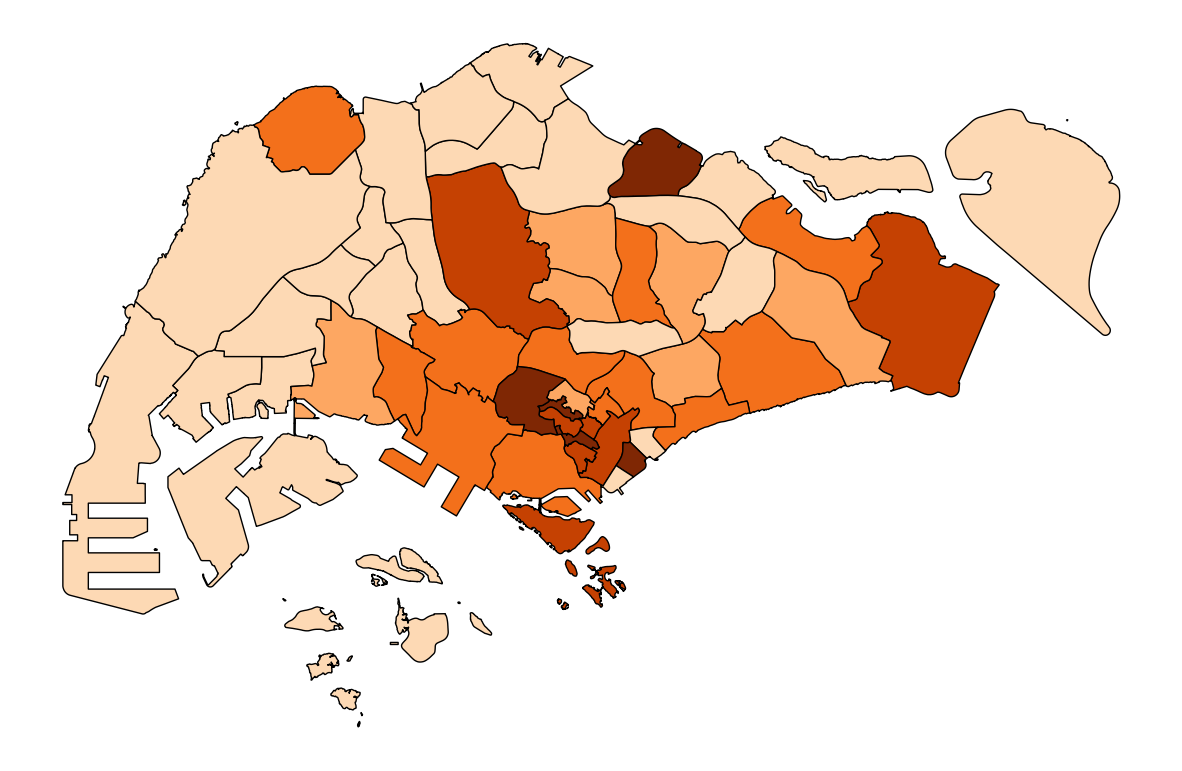

In [36]:
import matplotlib.pyplot as plt

ax = dissolve_gdf.plot(column='kopi_latte_ratio', 
                       cmap='Oranges',
                       scheme="BoxPlot", 
                       edgecolor='black', 
                       figsize=(15, 10))
ax.set_axis_off()

plt.savefig('plots/kopi_latte_map.jpg', bbox_inches='tight')


Now we have a map of the planning areas in Singapore with the concentration of cafes vs kopitiams. Areas with darker browns have more cafes per kopitiam compared to those in lighter shades of brown. The distribution of these follows the insights as mentioned above.